# Student Performance Indicator


### 1 Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2 Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race_ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum().sum()

np.int64(0)

 There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

There are no duplicates  values in the data set

### 3.3 Check data types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There are 5 categorical data types and 3 numerical data types

### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- The minimum score is  0 for math, reading has highest minimum score is 17
- Max score is 100 for math, reading and writing 

### 3.7 Exploring Data

In [10]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


#### Define numerical & categorical columns

In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns  total_score and average

In [12]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Finding the number of students who score max in any one section

In [13]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


#### Getting a count of number of students who scored less than 20 for any one section

In [14]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


<h3 style="color:green;"><b>Insights</b></h3>

 - From above analysis we get students have performed the worst in Maths and performed well in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution 


In [15]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams
from matplotlib.path import Path
from matplotlib.patches import PathPatch

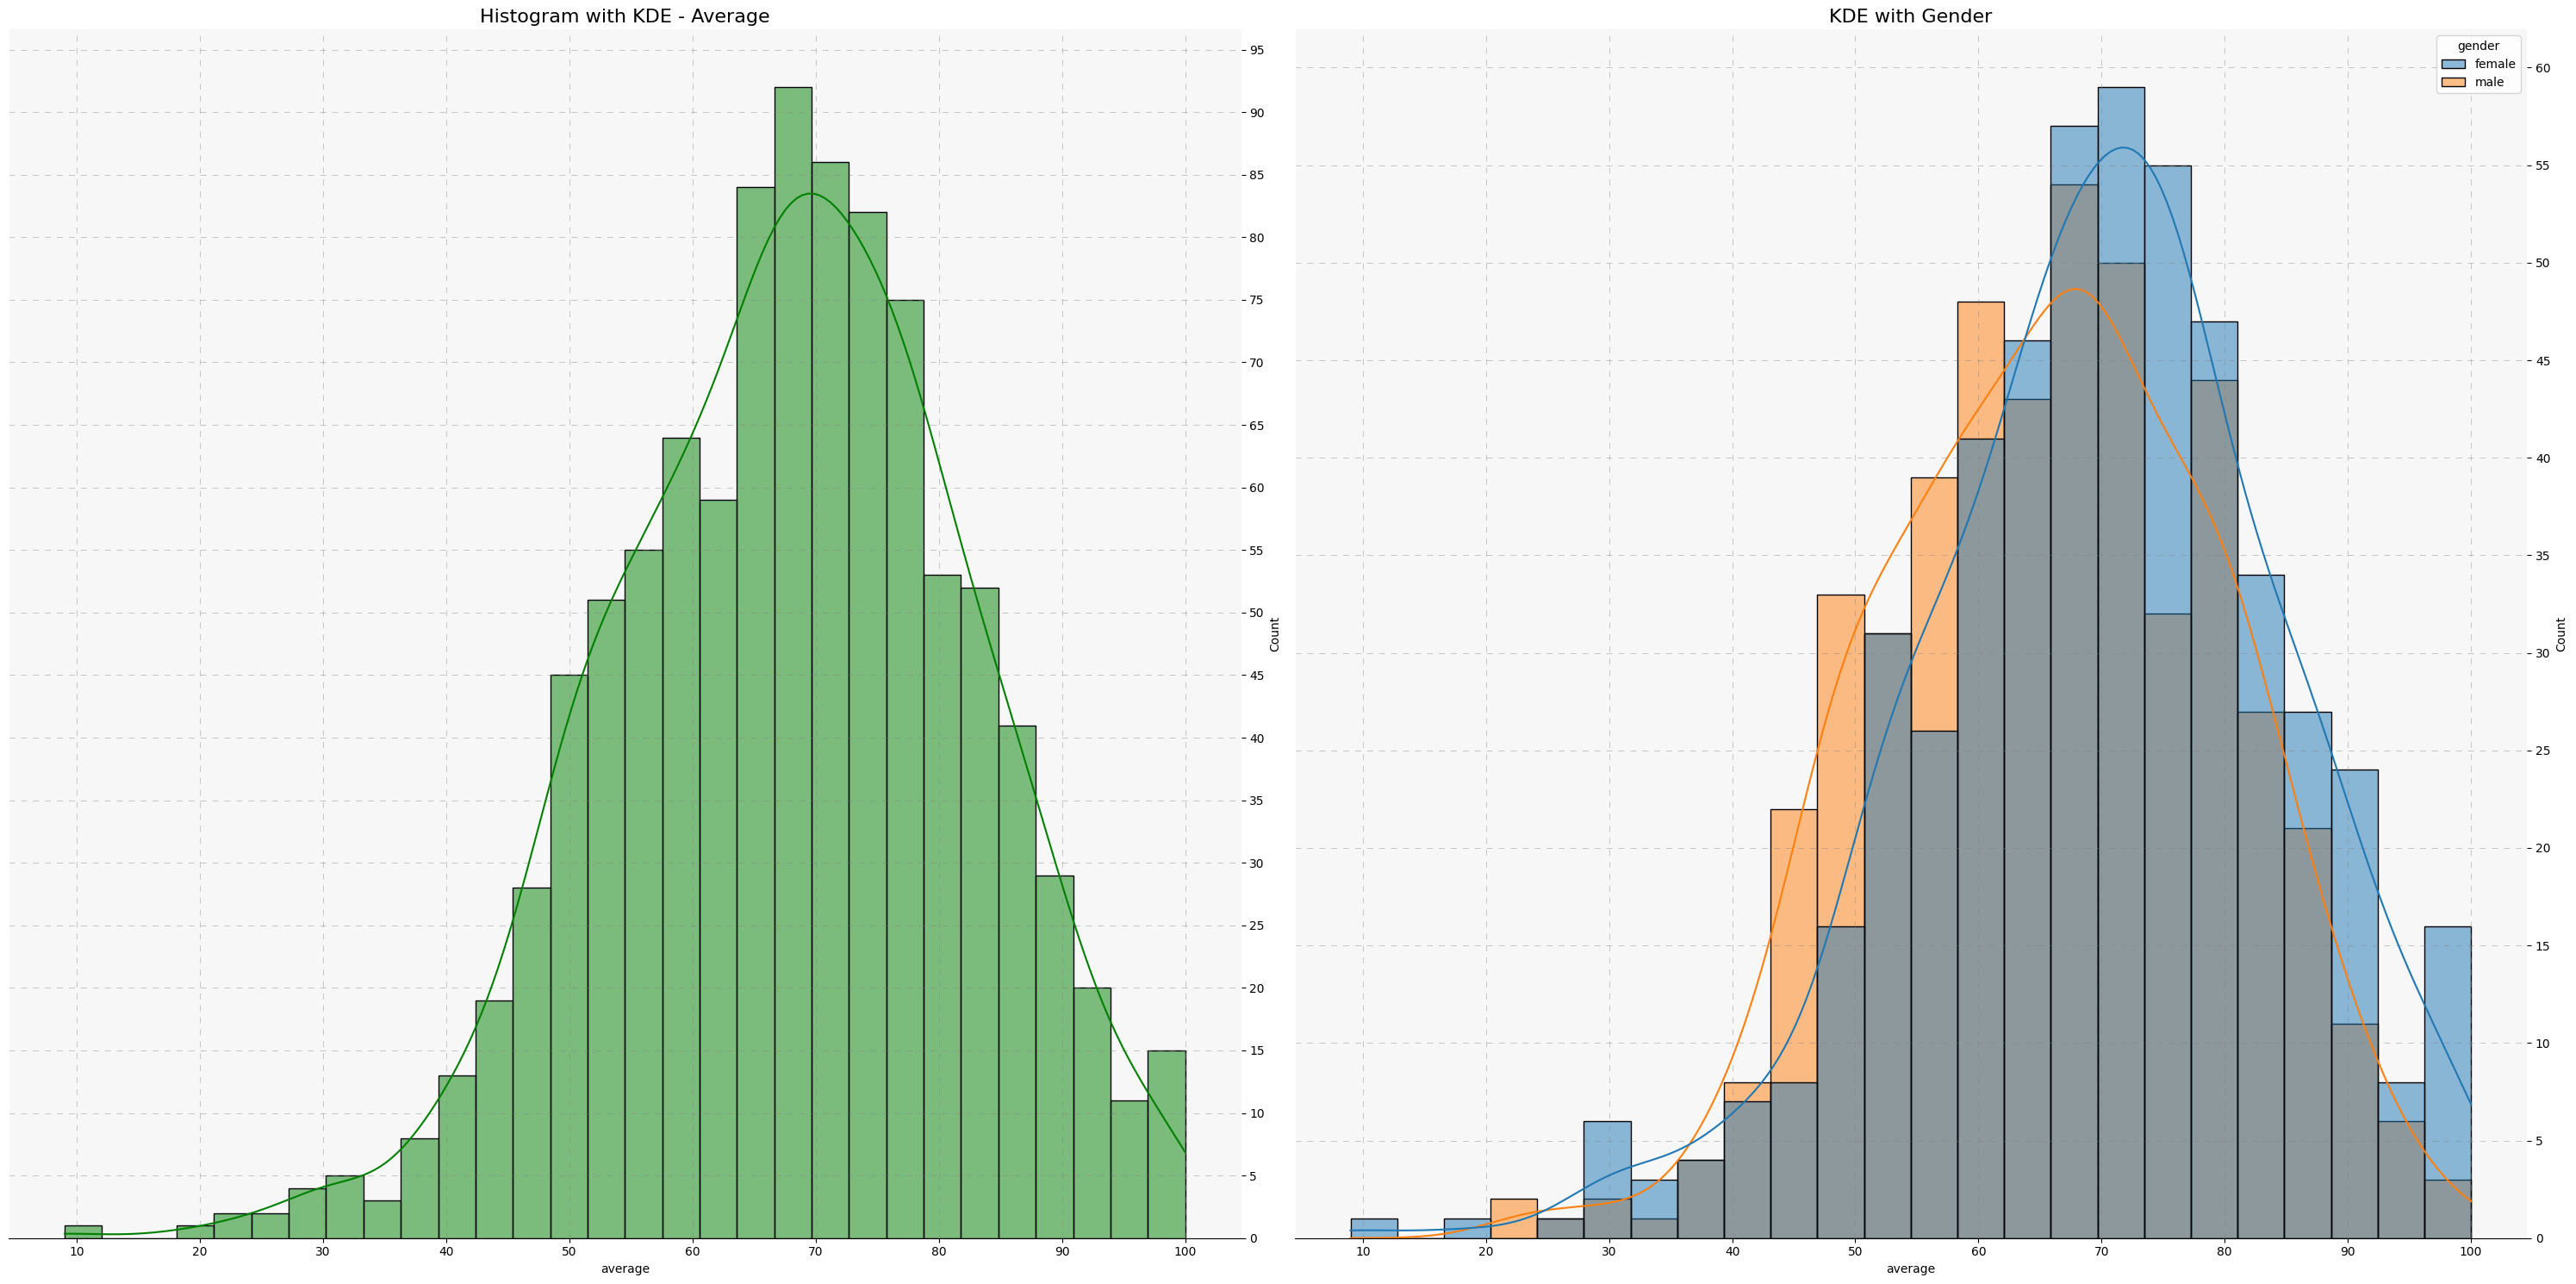

In [16]:
# General parameters
fig, axs = plt.subplots(1, 2, figsize=(30, 15))

# Subplot 1: Histogram with KDE for 'average'
axs[0].set_title("Histogram with KDE - Average", fontsize=16, color="black")
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])

# Customize the axes for subplot 1
axs[0].yaxis.tick_right()
axs[0].yaxis.set_label_position("right")
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(10))  # Set major ticks on x-axis
axs[0].yaxis.set_major_locator(ticker.MultipleLocator(5))  # Set major ticks on y-axis
axs[0].spines["top"].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines["bottom"].set_color("black")
axs[0].spines['left'].set_color('white')
axs[0].spines['left'].set_linewidth(1)
axs[0].tick_params(axis="x", colors="black")
axs[0].tick_params(axis="y", left=False, labelleft=False)
axs[0].set_facecolor('#f7f7f7')
axs[0].grid(color="gray", linestyle=(0, (10, 10)), linewidth=0.5, alpha=0.6)

# Subplot 2: KDE with 'gender' hue
axs[1].set_title("KDE with Gender", fontsize=16, color="black")
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])

# Customize the axes for subplot 2
axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(10))  # Set major ticks on x-axis
axs[1].yaxis.set_major_locator(ticker.MultipleLocator(5))  # Set major ticks on y-axis
axs[1].spines["top"].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines["bottom"].set_color("black")
axs[1].spines['left'].set_color('white')
axs[1].spines['left'].set_linewidth(1)
axs[1].tick_params(axis="x", colors="black")
axs[1].tick_params(axis="y", left=False, labelleft=False)
axs[1].set_facecolor('#f7f7f7')
axs[1].grid(color="gray", linestyle=(0, (10, 10)), linewidth=0.5, alpha=0.6)

# Layout adjustments
plt.tight_layout()

# Display the plot
plt.show()

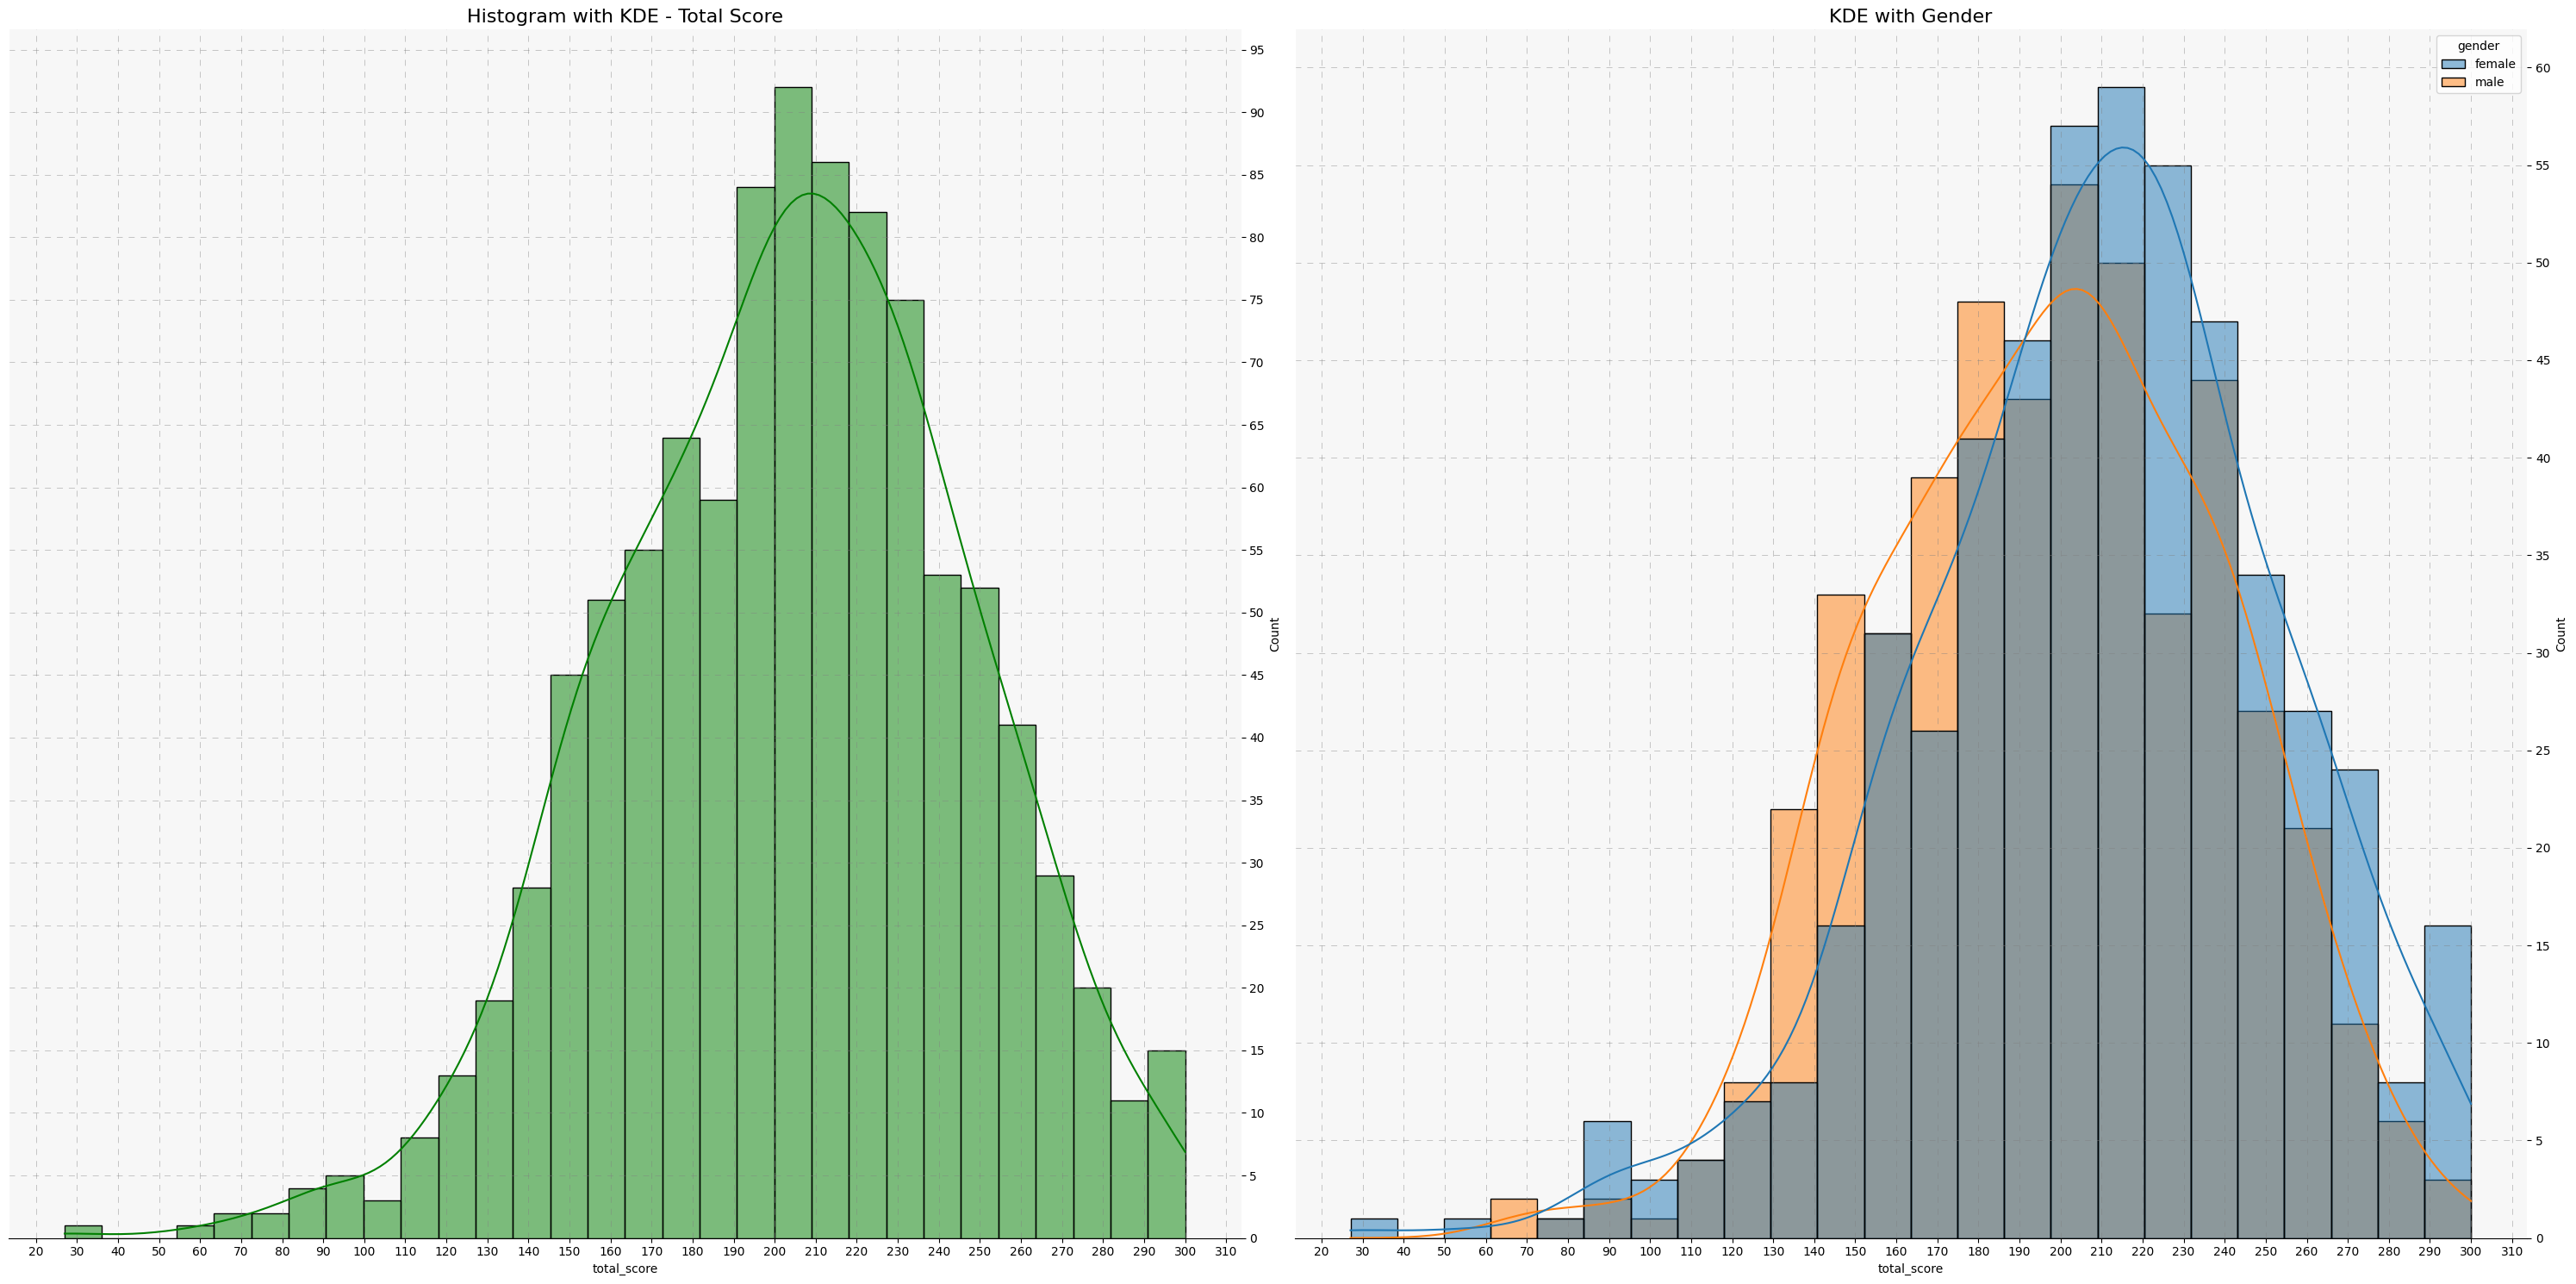

In [17]:
# General parameters
fig, axs = plt.subplots(1, 2, figsize=(30, 15))

# Subplot 1: Histogram with KDE for 'average'
axs[0].set_title("Histogram with KDE - Total Score", fontsize=16, color="black")
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g', ax=axs[0])

# Customize the axes for subplot 1
axs[0].yaxis.tick_right()
axs[0].yaxis.set_label_position("right")
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(10))  # Set major ticks on x-axis
axs[0].yaxis.set_major_locator(ticker.MultipleLocator(5))  # Set major ticks on y-axis
axs[0].spines["top"].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines["bottom"].set_color("black")
axs[0].spines['left'].set_color('white')
axs[0].spines['left'].set_linewidth(1)
axs[0].tick_params(axis="x", colors="black")
axs[0].tick_params(axis="y", left=False, labelleft=False)
axs[0].set_facecolor('#f7f7f7')
axs[0].grid(color="gray", linestyle=(0, (10, 10)), linewidth=0.5, alpha=0.6)

# Subplot 2: KDE with 'gender' hue
axs[1].set_title("KDE with Gender", fontsize=16, color="black")
sns.histplot(data=df, x='total_score', kde=True, hue='gender', ax=axs[1])

# Customize the axes for subplot 2
axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(10))  # Set major ticks on x-axis
axs[1].yaxis.set_major_locator(ticker.MultipleLocator(5))  # Set major ticks on y-axis
axs[1].spines["top"].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines["bottom"].set_color("black")
axs[1].spines['left'].set_color('white')
axs[1].spines['left'].set_linewidth(1)
axs[1].tick_params(axis="x", colors="black")
axs[1].tick_params(axis="y", left=False, labelleft=False)
axs[1].set_facecolor('#f7f7f7')
axs[1].grid(color="gray", linestyle=(0, (10, 10)), linewidth=0.5, alpha=0.6)

# Layout adjustments
plt.tight_layout()

# Display the plot
plt.show()

<h3 style="color:green;"><b>Insights</b></h3>

- Female students tend to perform well then male students.

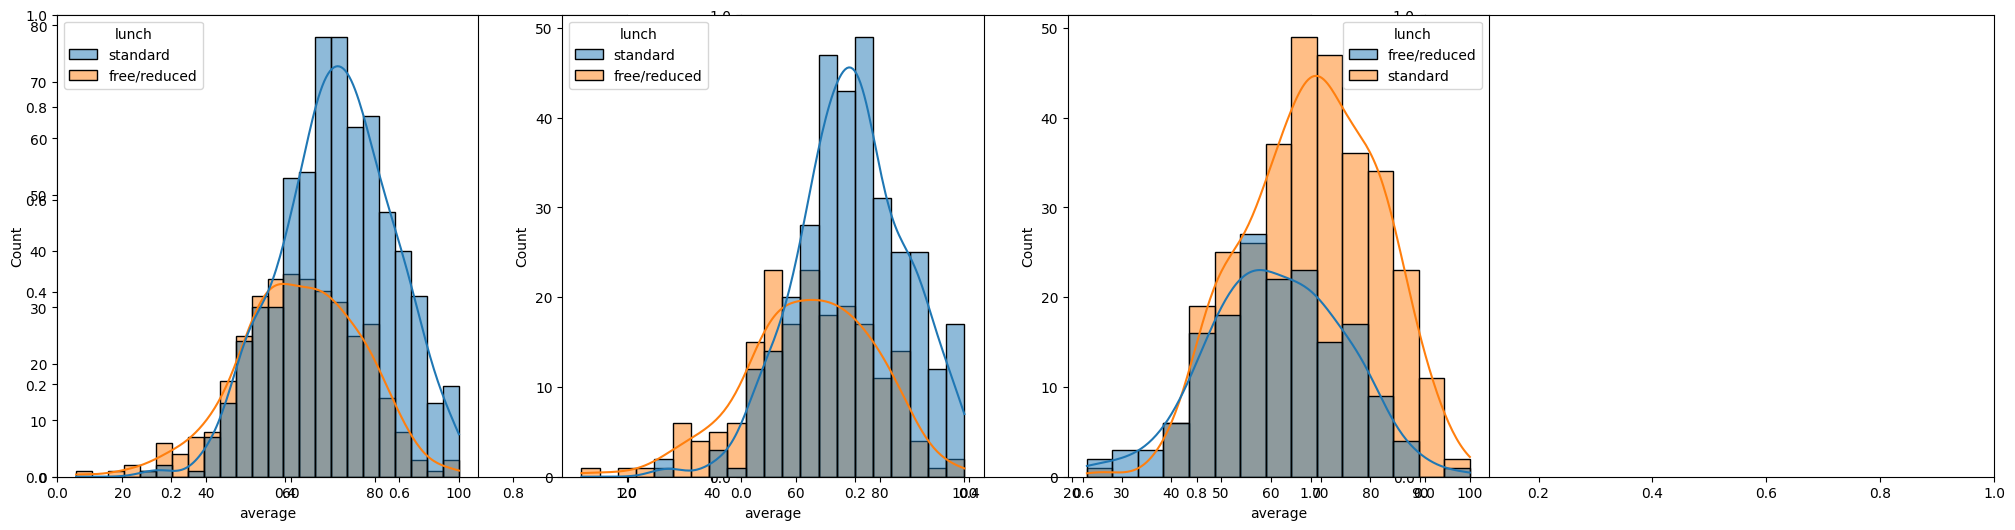

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

<h3 style="color:green;"><b>Insights</b></h3>

- Students taking Standard lunch tends to perform well in exams.
- Both Male and Female Students who takes Standard lunch tends to  perform well in exams.

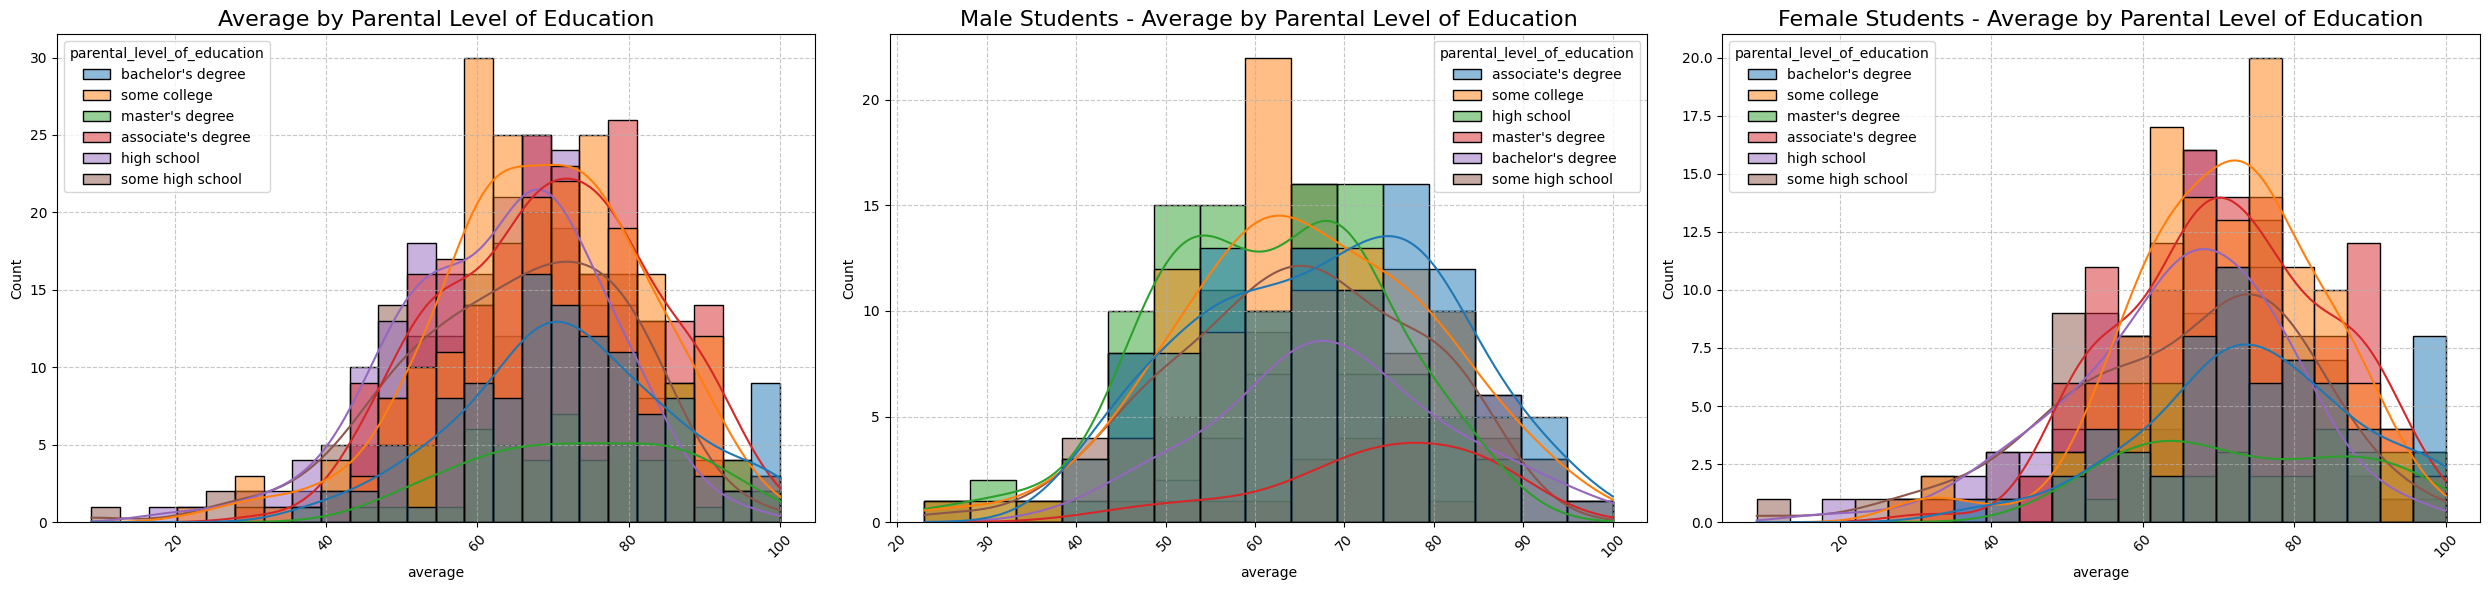

In [19]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# Subplot 1: Parental level of education with hue
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education', ax=axs[0])
axs[0].set_title("Average by Parental Level of Education", fontsize=16, color="black")
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
axs[0].grid(True, linestyle='--', alpha=0.7)

# Subplot 2: For Male Students
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education', ax=axs[1])
axs[1].set_title("Male Students - Average by Parental Level of Education", fontsize=16, color="black")
axs[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
axs[1].grid(True, linestyle='--', alpha=0.7)

# Subplot 3: For Female Students
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education', ax=axs[2])
axs[2].set_title("Female Students - Average by Parental Level of Education", fontsize=16, color="black")
axs[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
axs[2].grid(True, linestyle='--', alpha=0.7)

# Adjust layout to make sure labels don't overlap
plt.tight_layout()

# Show the plots
plt.show()

<h3 style="color:green;"><b>Insights</b></h3>

- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

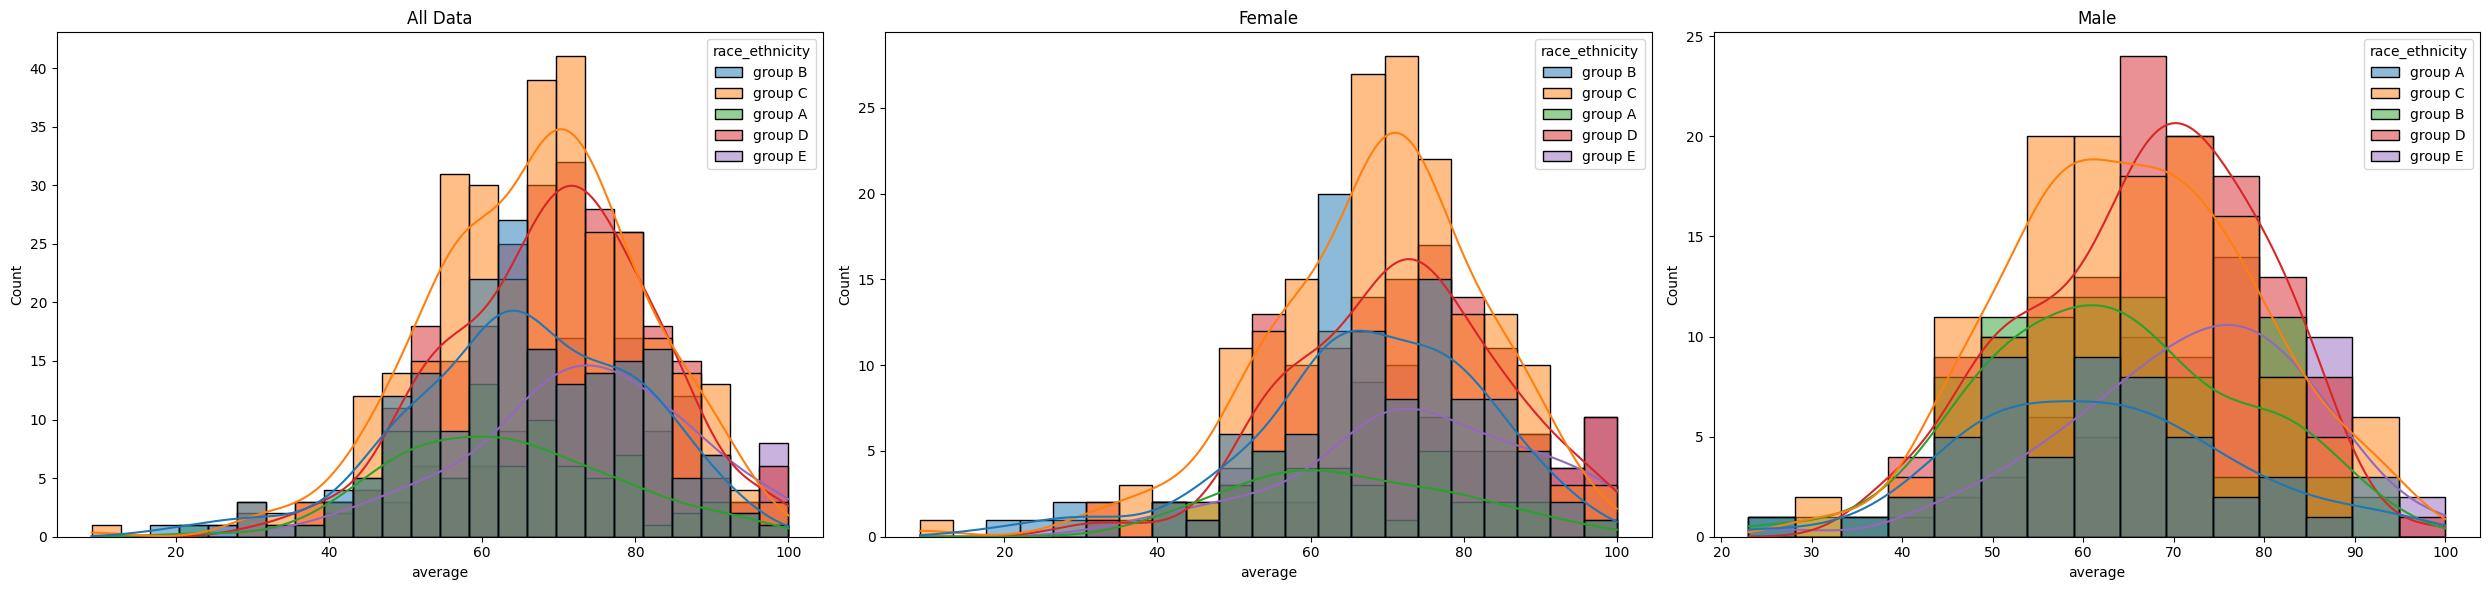

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# List of data slices and titles for each subplot
data_slices = [
    (df, 'All Data'),
    (df[df.gender == 'female'], 'Female'),
    (df[df.gender == 'male'], 'Male')
]

# Plot each slice on the corresponding subplot
for ax, (data, title) in zip(axes, data_slices):
    sns.histplot(data=data, x='average', kde=True, hue='race_ethnicity', ax=ax)
    ax.set_title(title)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


<h3 style="color:green;"><b>Insights</b></h3>

- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

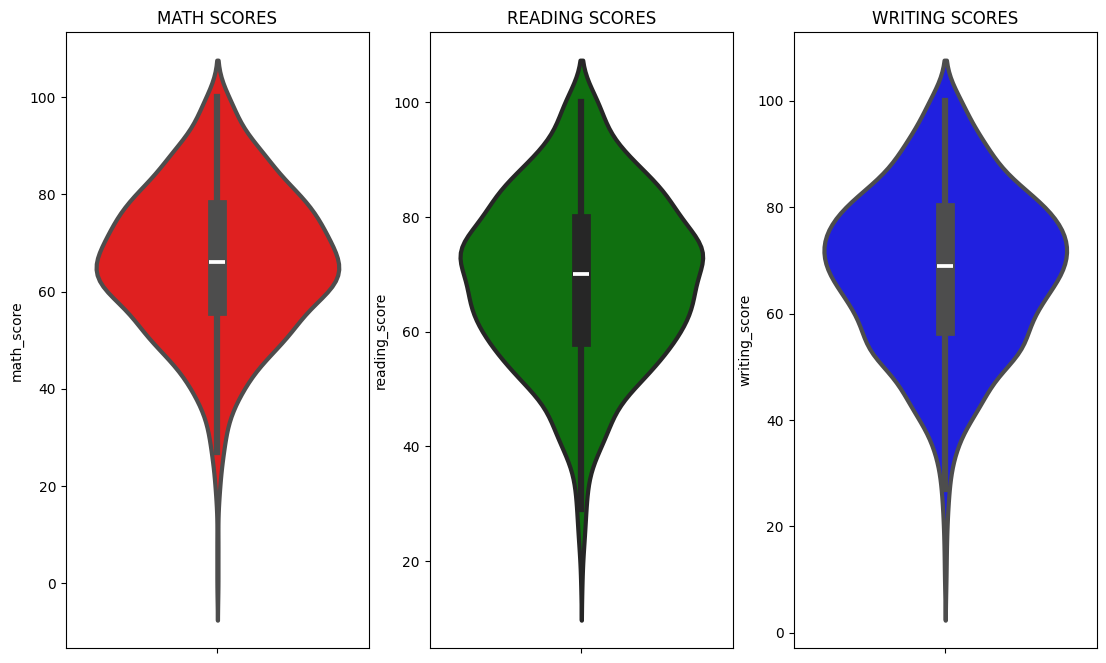

In [21]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

<h3 style="color:green;"><b>Insights</b></h3>

- Overall: The violin plots suggest that students tend to score lower in writing compared to math and reading.
- Spread of Scores: The violin plots also reveal that the spread of scores is relatively similar across all three subjects.

#### 4.3 Multivariate analysis using pieplot

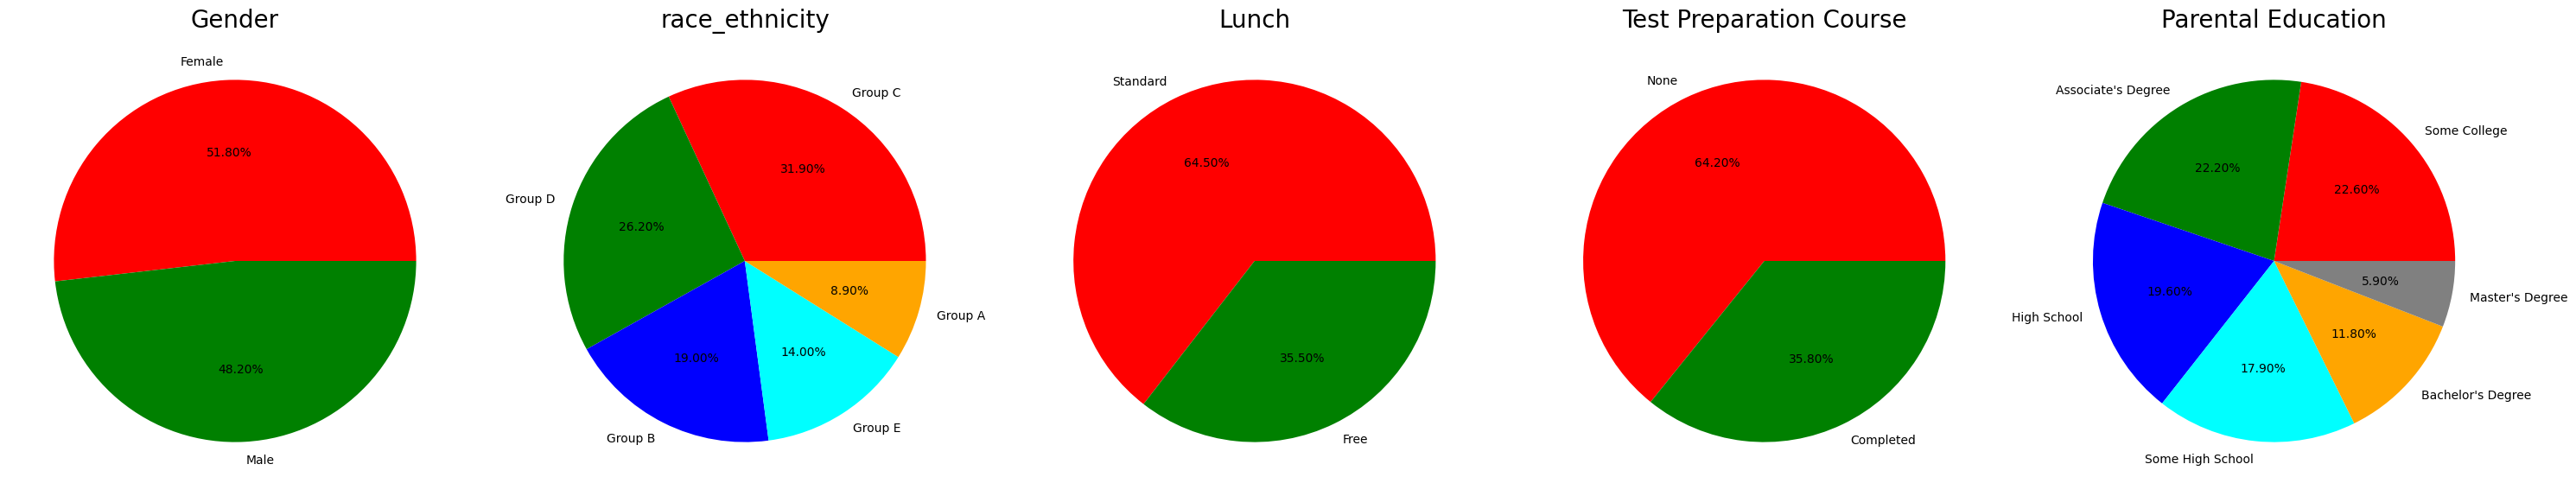

In [22]:
# Data for the pie charts
data = {
    'Gender': {
        'size': df['gender'].value_counts(),
        'labels': ['Female', 'Male'],
        'colors': ['red', 'green']
    },
    'race_ethnicity': {
        'size': df['race_ethnicity'].value_counts(),
        'labels': ['Group C', 'Group D', 'Group B', 'Group E', 'Group A'],
        'colors': ['red', 'green', 'blue', 'cyan', 'orange']
    },
    'Lunch': {
        'size': df['lunch'].value_counts(),
        'labels': ['Standard', 'Free'],
        'colors': ['red', 'green']
    },
    'Test Preparation Course': {
        'size': df['test_preparation_course'].value_counts(),
        'labels': ['None', 'Completed'],
        'colors': ['red', 'green']
    },
    'Parental Education': {
        'size': df['parental_level_of_education'].value_counts(),
        'labels': ['Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"],
        'colors': ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
    }
}

# Create a 1x5 subplot
fig, axs = plt.subplots(1, 5, figsize=(30, 12))

# Function to create pie charts
def create_pie_chart(ax, size, labels, colors, title):
    ax.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
    ax.set_title(title, fontsize=20)
    ax.axis('off')

# Loop through data dictionary to plot each pie chart
for i, (title, pie_data) in enumerate(data.items()):
    create_pie_chart(axs[i], pie_data['size'], pie_data['labels'], pie_data['colors'], title)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

<h3 style="color:green;"><b>Insights</b></h3>

<h3 style="color:red;"><b>Overall Observations:</b></h3>



<ul>
  <li><b><span style="color:red;">Gender:</span></b> The class appears to have a roughly equal distribution of males and females.</li>
  <li><b><span style="color:red;">Race/Ethnicity:</span></b> The majority of students belong to Group C, followed by Group D. Groups A and E have the smallest representation.</li>
  <li><b><span style="color:red;">Lunch:</span></b> A significant portion of students receive standard lunch, while a considerable number receive free/reduced lunch.</li>
  <li><b><span style="color:red;">Test Preparation Course:</span></b> The majority of students did not complete any test preparation course.</li>
  <li><b><span style="color:red;">Parental Education:</span></b> A significant portion of parents have some college education, followed by those with an associate's degree. A smaller percentage have a bachelor's or master's degree.</li>
</ul>

<h3 style="color:red;"><b>Possible Inferences::</b></h3>



<ul>
  <li><b><span style="color:red;">Diversity:</span></b> The class exhibits some diversity in terms of race_ethnicity and parental education levels.</li>
  <li><b><span style="color:red;">Socioeconomic Factors:</span></b> The distribution of students receiving free/reduced lunch suggests that socioeconomic factors might play a role in the student population.</li>
  <li><b><span style="color:red;">Test Preparation:</span></b> The lack of test preparation courses for a majority of students could potentially impact their academic performance.</li>
</ul>


#### 4.4 Feature Wise Visualization

#### UNIVARIATE ANALYSIS
<h2><b><span style="color: Orange;">Gender</span></b></h2>



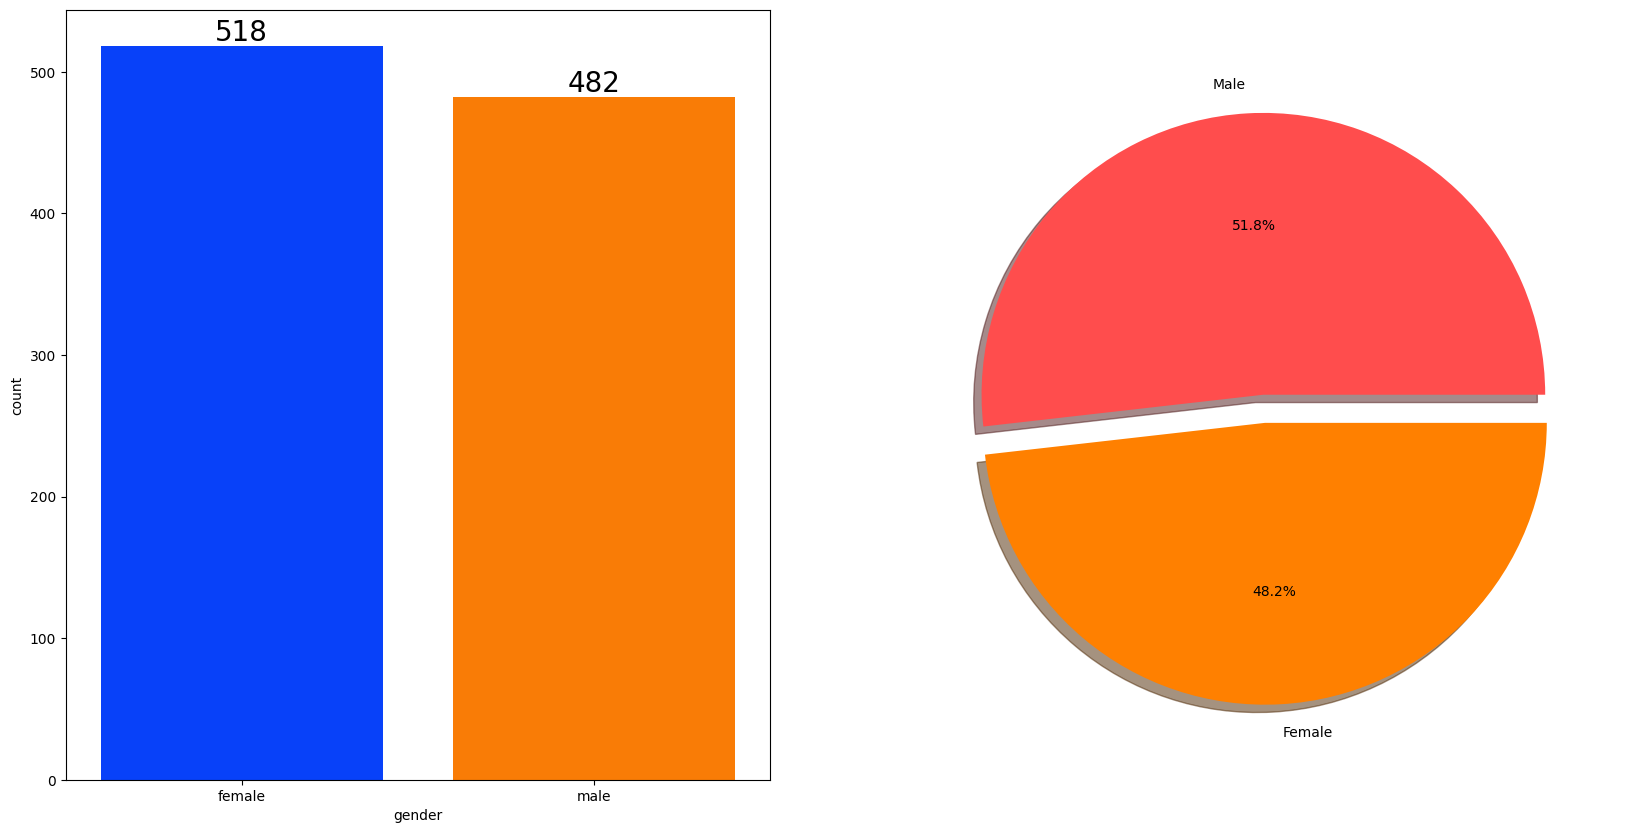

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### <span style="color:green;"><b>Insights</b></span>

- The dataset appears to have a nearly equal distribution of data across genders


In [24]:
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'total_score', 'average']

# Group by 'gender' and calculate the mean for the numeric columns
gender_group = df[numeric_columns].groupby(df['gender']).mean()

# Now, gender_group will contain the mean values for each numeric column, grouped by 'gender'
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


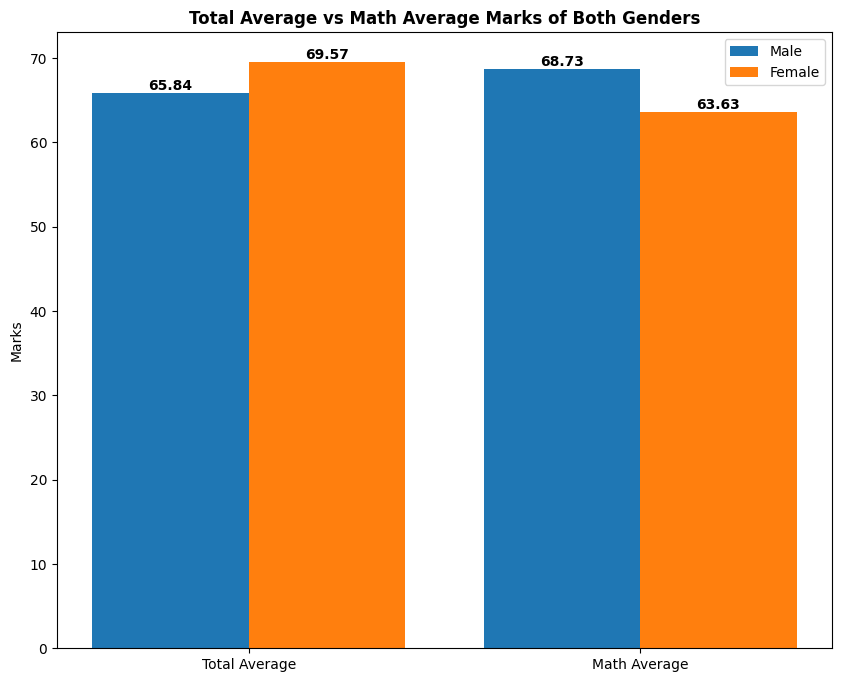

In [25]:
female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math_score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math_score']]

# Step 1: Define X-axis labels and positions
X = ['Total Average', 'Math Average']
X_axis = np.arange(len(X))

# Step 2: Plotting the bar chart
plt.figure(figsize=(10, 8))

# Bar for Male
bars_male = plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')

# Bar for Female
bars_female = plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

# Step 3: Adding values at the top of each bar
for bar in bars_male:
    height = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # Position the text
             f'{height:.2f}',  # Format the value to 2 decimal places
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

for bar in bars_female:
    height = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # Position the text
             f'{height:.2f}',  # Format the value to 2 decimal places
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Step 4: Adding titles and labels
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average vs Math Average Marks of Both Genders", fontweight='bold')
plt.legend()

# Show the plot
plt.show()

### <span style="color:green;"><b>Insights</b></span>

- Females tend to have higher overall average scores compared to males.
- Males outperform females in Math scores

<h2><b><span style="color: orange;">race_ethnicity</span></b></h2>


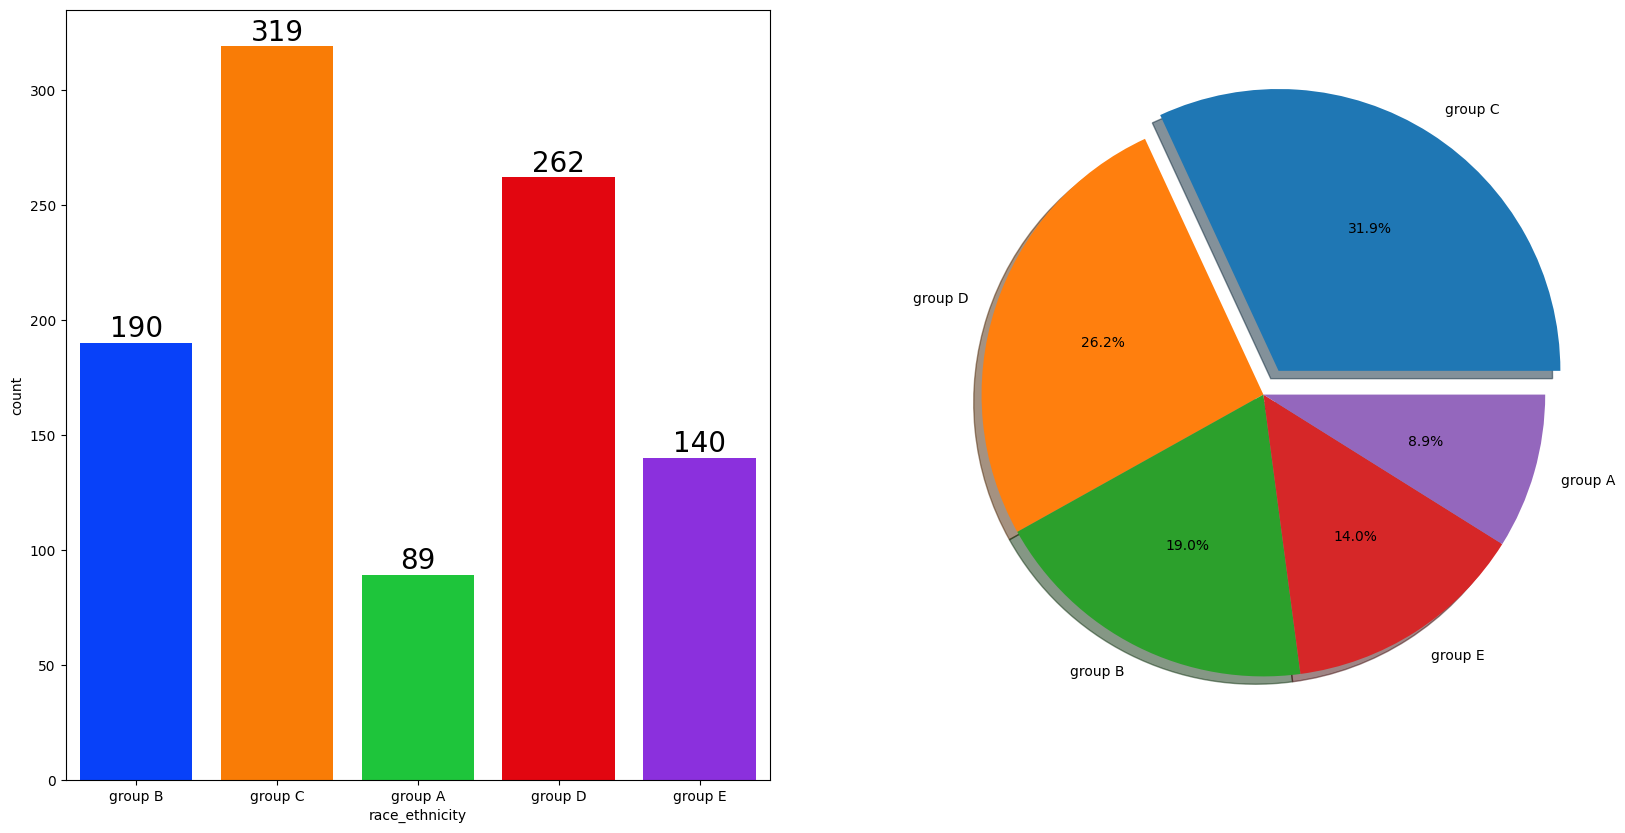

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

### <span style="color:green;"><b>Insights</b></span>

- most of the students belong to group C and D
- Group A has the least no of students  

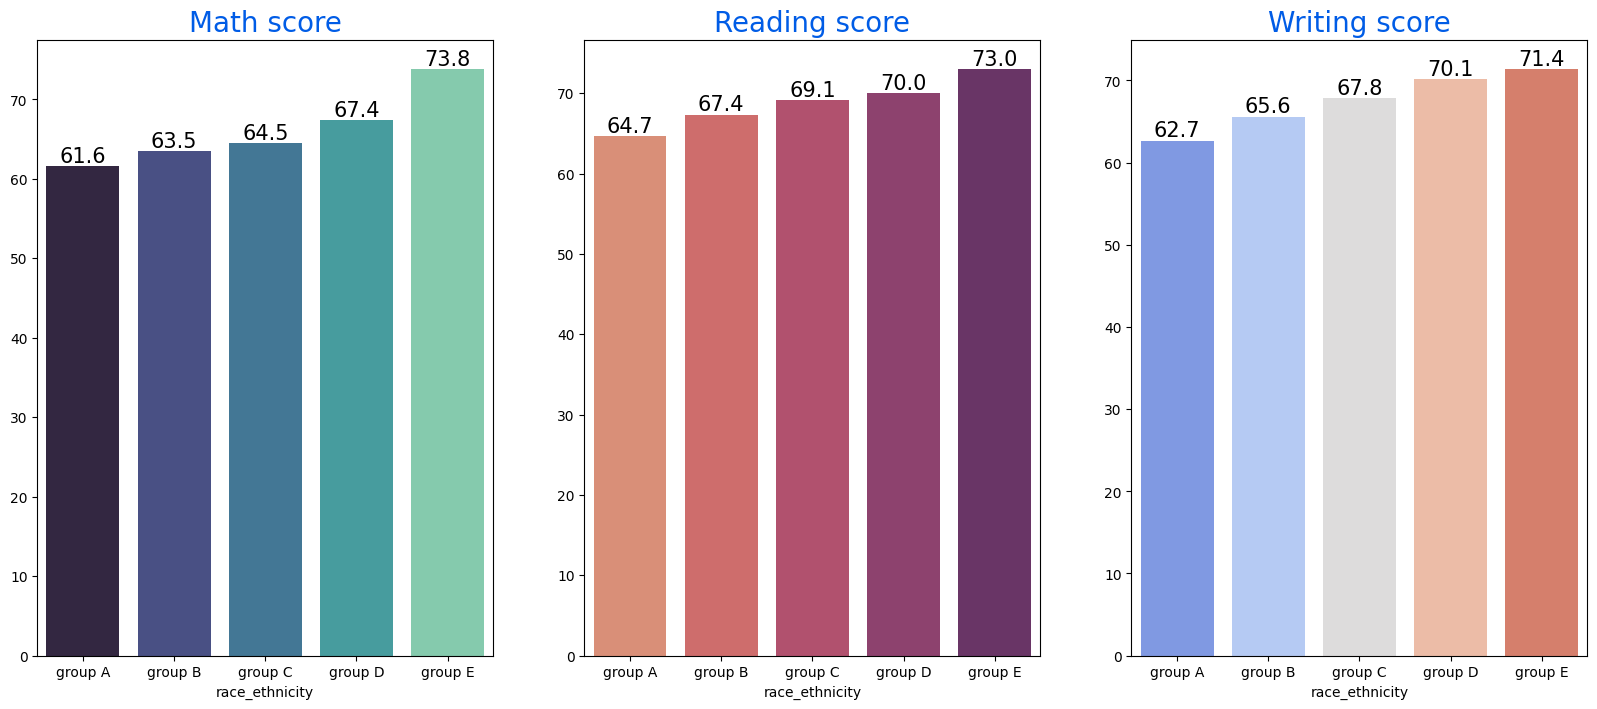

In [27]:
Group_data2 = df.groupby('race_ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Math score barplot
sns.barplot(x=Group_data2['math_score'].mean().index, 
            y=Group_data2['math_score'].mean().values, 
            palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)

# Add rounded labels for math scores
for container in ax[0].containers:
    # Extract heights and round to 1 decimal place
    ax[0].bar_label(container, color='black', size=15, labels=[f"{round(bar.get_height(), 1)}" for bar in container])

# Reading score barplot
sns.barplot(x=Group_data2['reading_score'].mean().index, 
            y=Group_data2['reading_score'].mean().values, 
            palette='flare', ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)

# Add rounded labels for reading scores
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15, labels=[f"{round(bar.get_height(), 1)}" for bar in container])

# Writing score barplot
sns.barplot(x=Group_data2['writing_score'].mean().index, 
            y=Group_data2['writing_score'].mean().values, 
            palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)

# Add rounded labels for writing scores
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15, labels=[f"{round(bar.get_height(), 1)}" for bar in container])

# Show the plot
plt.show()


### <span style="color:green;"><b>Insights</b></span>


- Group E has the highest scores across all sections (Math, Reading, and Writing).
- Group A has the lowest scores across all sections.

<h2><b><span style="color: Orange;">PARENTAL LEVEL OF EDUCATION</span></b></h2>

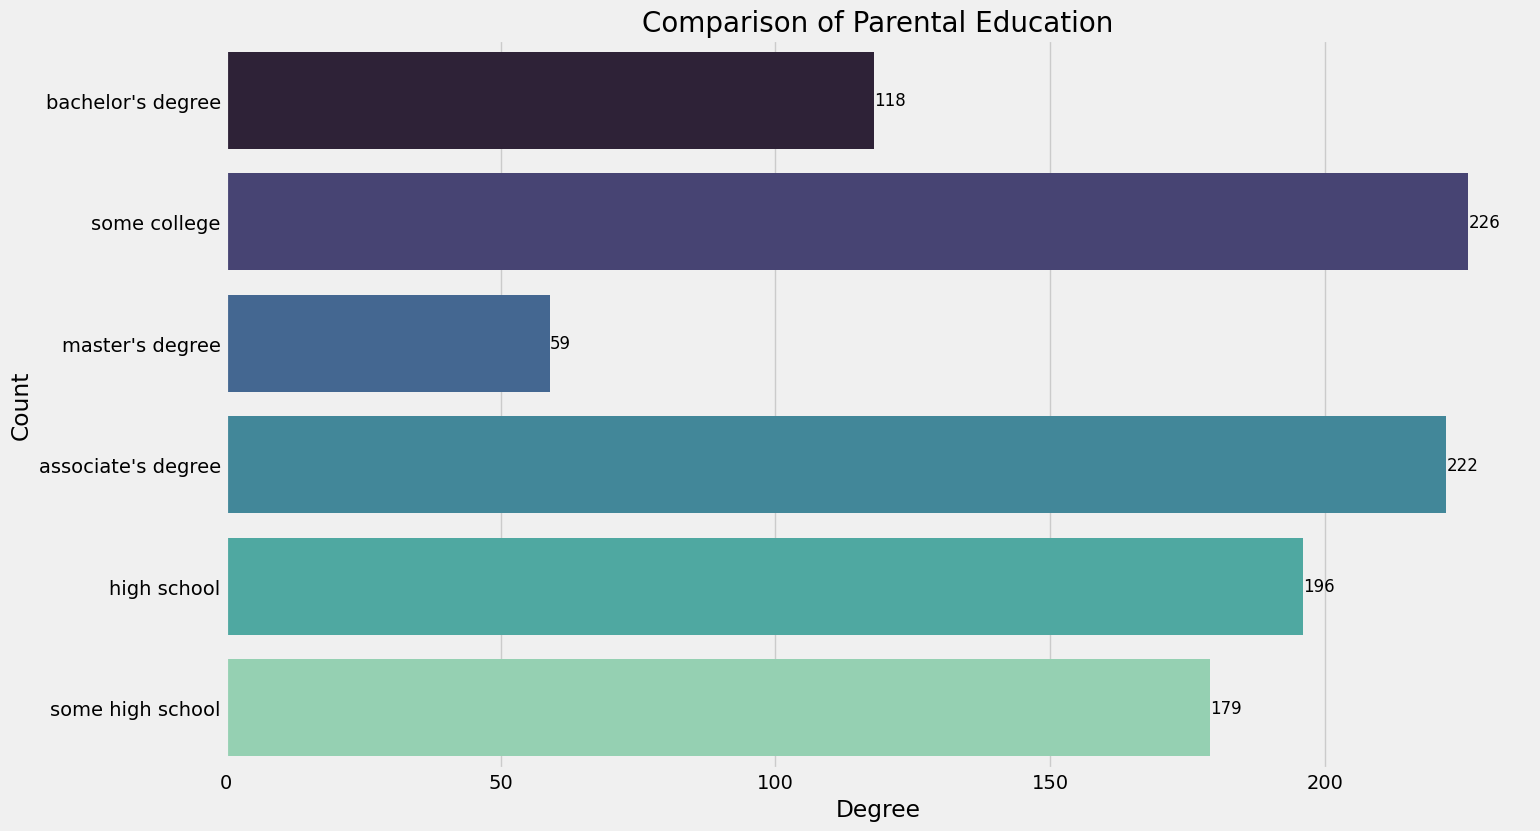

In [28]:
# Set the figure size and style
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Create the countplot
ax = sns.countplot(df['parental_level_of_education'], palette='mako')

# Add title and labels
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, color='black', size=12)

# Show the plot
plt.show()


### <span style="color:green;"><b>Insights</b></span>

- A significant proportion of parents in this dataset have some college education.
- Parents with master's degrees are less common in the dataset.

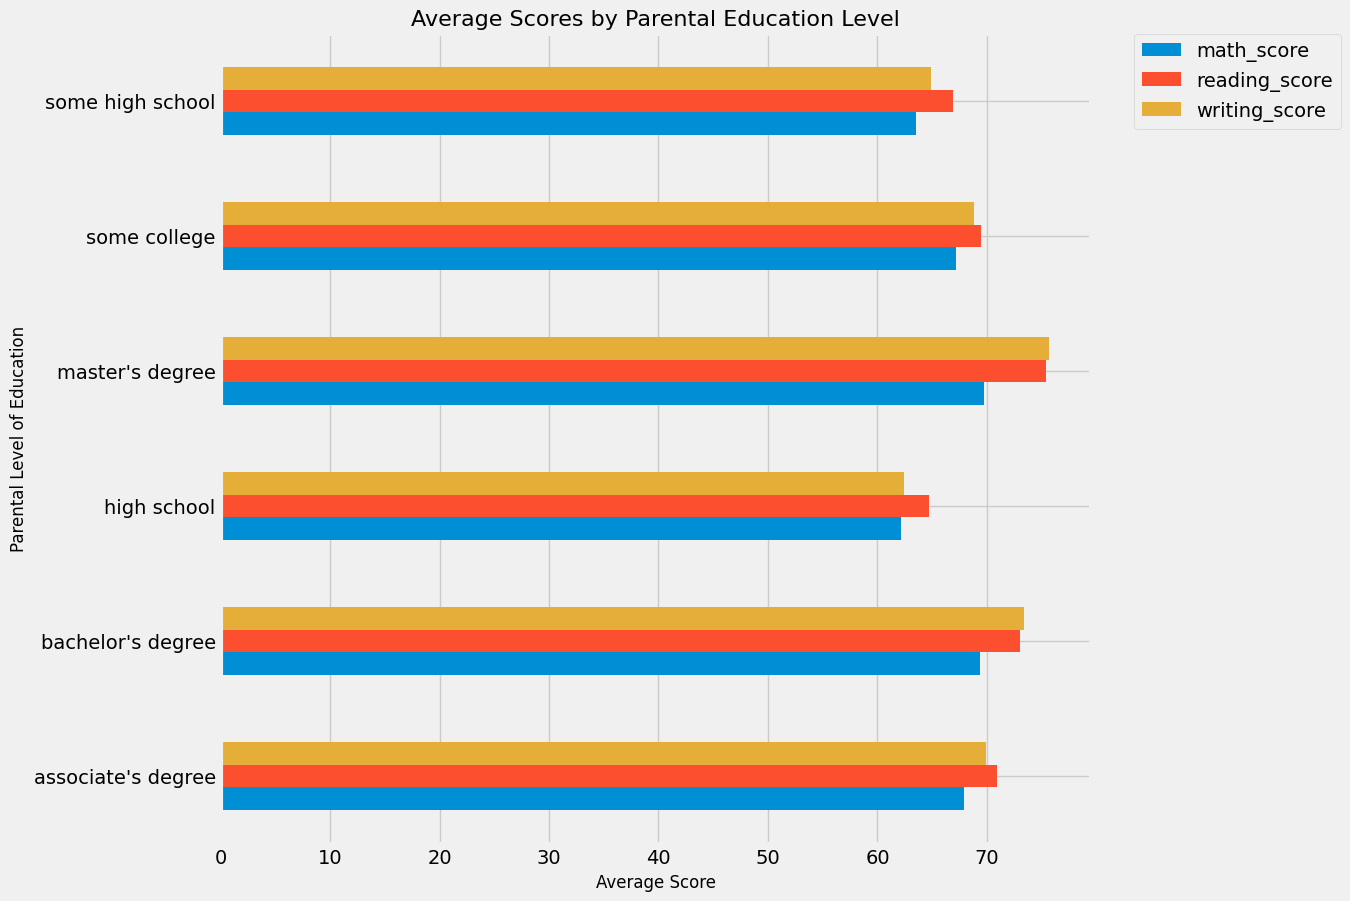

In [29]:


# Select numeric columns only
numeric_columns = ['math_score', 'reading_score', 'writing_score']  # Add other numeric columns if needed

# Group by 'parental_level_of_education' and calculate the mean for numeric columns
df.groupby('parental_level_of_education')[numeric_columns].mean().plot(kind='barh', figsize=(10, 10))

# Adjust the legend placement
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Set the title and labels for clarity (optional)
plt.title("Average Scores by Parental Education Level", fontsize=16)
plt.xlabel("Average Score", fontsize=12)
plt.ylabel("Parental Level of Education", fontsize=12)

# Show the plot
plt.show()


### <span style="color:green;"><b>Insights</b></span>

    Overall Trend:
- <b><span style="color:red;">Positive Correlation:</b></span> Higher parental education levels correlate with higher average student scores in math, reading, and writing.





      Specific Observations:
<ul>
  <li><span style="color:red; font-weight: bold;">Math:</span> Students with parents who have a bachelor's degree score the highest, while those with some high school score the lowest.</li>
  <li><span style="color:red; font-weight: bold;">Reading:</span> Bachelor's degree parents lead in scores, with a smaller gap between master's degree and some college parents.</li>
  <li><span style="color:red; font-weight: bold;">Writing:</span> Similar to reading, bachelor's degree parents score the highest, with minimal difference between master's degree and some college.</li>
</ul>


     Inferences:
 - <span style="color:red; font-weight: bold;">Parental Education:</span> Higher parental education may improve student performance through better resources, expectations, and involvement. As parental education level increases, the average student scores tend to improve across all subjects.

<b><h2><span style="color: Orange">Lunch</span></b></h2>

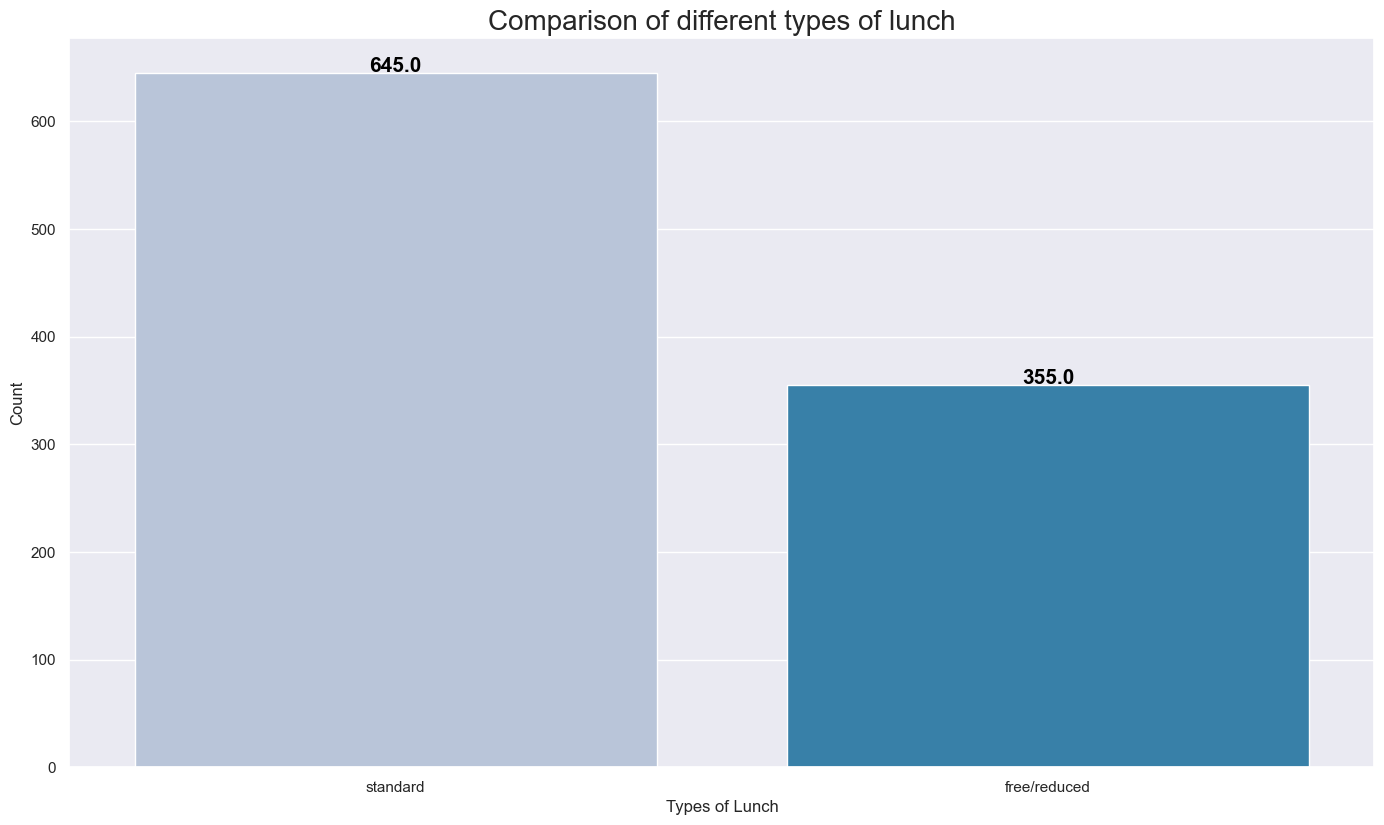

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
plt.rcParams['figure.figsize'] = (15, 9)
sns.set_theme()  # Use Seaborn's default theme

# Create the countplot
ax = sns.countplot(data=df, x='lunch', palette='PuBu')  # Ensure data and column are passed correctly

# Set title and labels
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

# Add values on top of each bar
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    ax.annotate(f'{height}',  # The value to annotate
                (p.get_x() + p.get_width() / 2., height),  # Position the annotation in the middle of the bar
                ha='center', va='center', fontsize=15, color='black', fontweight='bold', xytext=(0, 5), 
                textcoords='offset points')  # Adjust the position of the text slightly upwards

# Show the plot
plt.show()


#### Insights<li><span style="color:red; font-weight: bold;">
- most of the students opted for standard lunch 


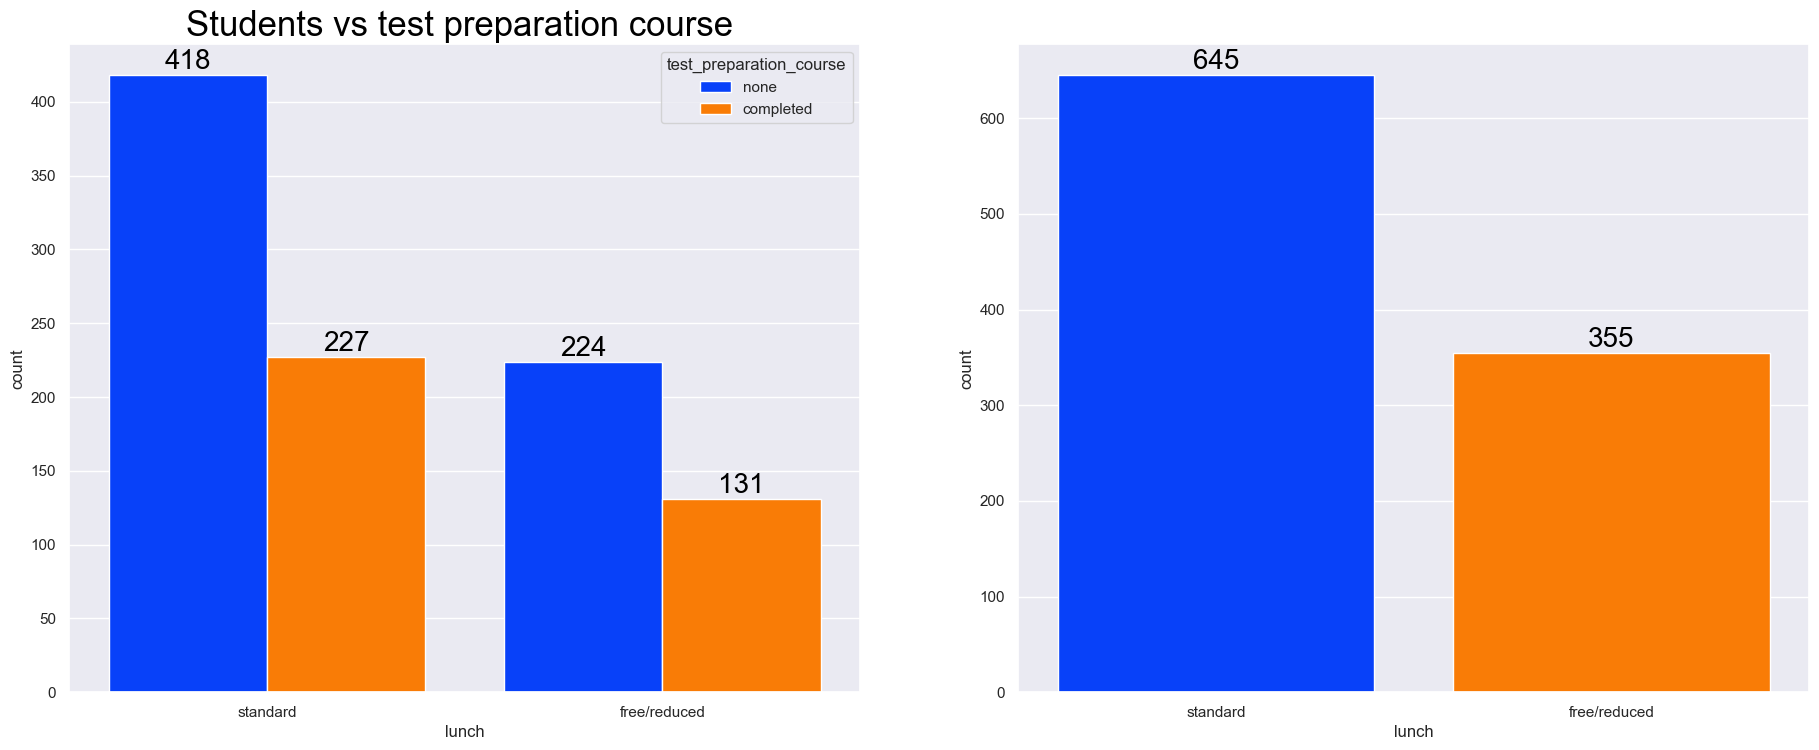

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['lunch'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['lunch'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

### <span style="color:green;font-weight: bold;"><b>Insights</b></span>
    Overall:
- <span style="color:red;font-weight: bold;">Test Preparation Impact:</span> Students who completed a test preparation course performed better, regardless of lunch program.

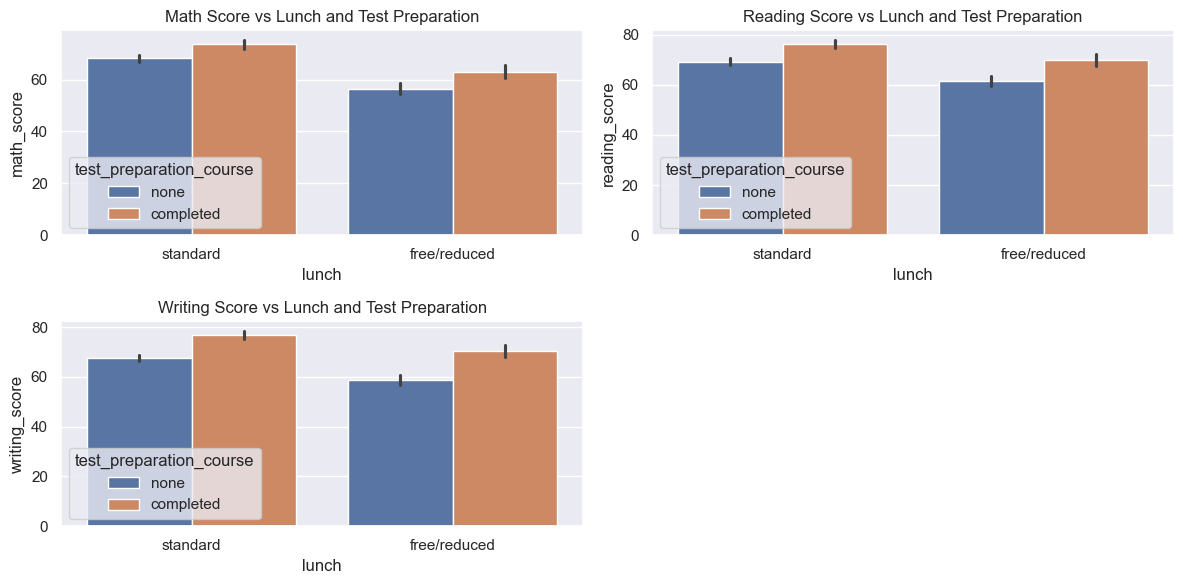

In [32]:

# Set the figure size
plt.figure(figsize=(12, 6))

# First subplot: Math score vs. lunch and test preparation course
plt.subplot(2, 2, 1)
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.title('Math Score vs Lunch and Test Preparation')

# Second subplot: Reading score vs. lunch and test preparation course
plt.subplot(2, 2, 2)
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.title('Reading Score vs Lunch and Test Preparation')

# Third subplot: Writing score vs. lunch and test preparation course
plt.subplot(2, 2, 3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.title('Writing Score vs Lunch and Test Preparation')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### <span style="color:green;font-weight: bold;"><b>Insights</b></span>
- students who completed test preperation course performed well in all the sections

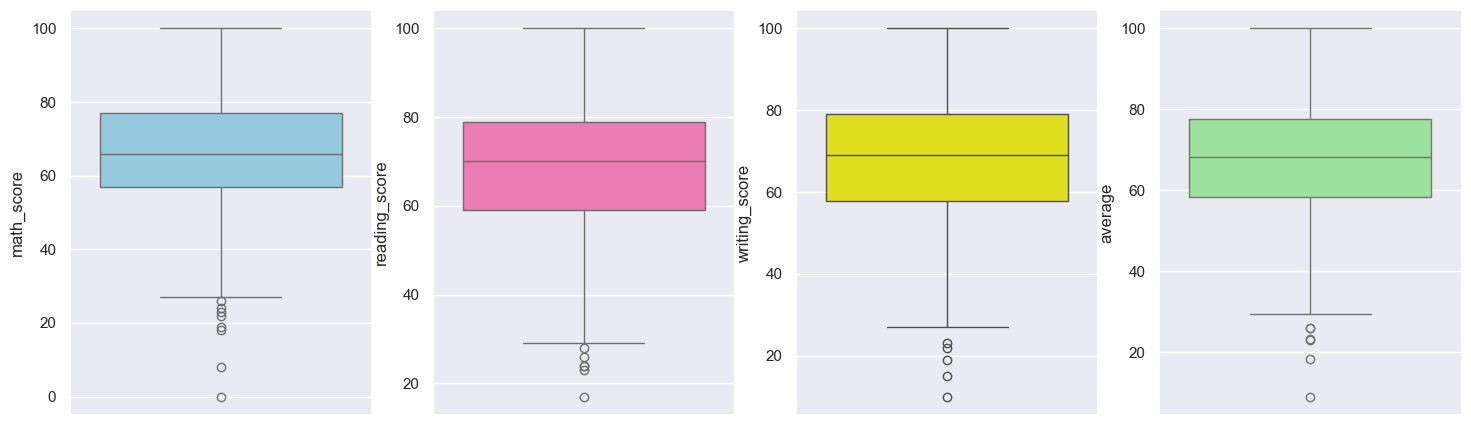

In [33]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### <span style="color:green;font-weight: bold;"><b>Insights</b></span> 
- Outliers are present for all the sections and need to handle them 

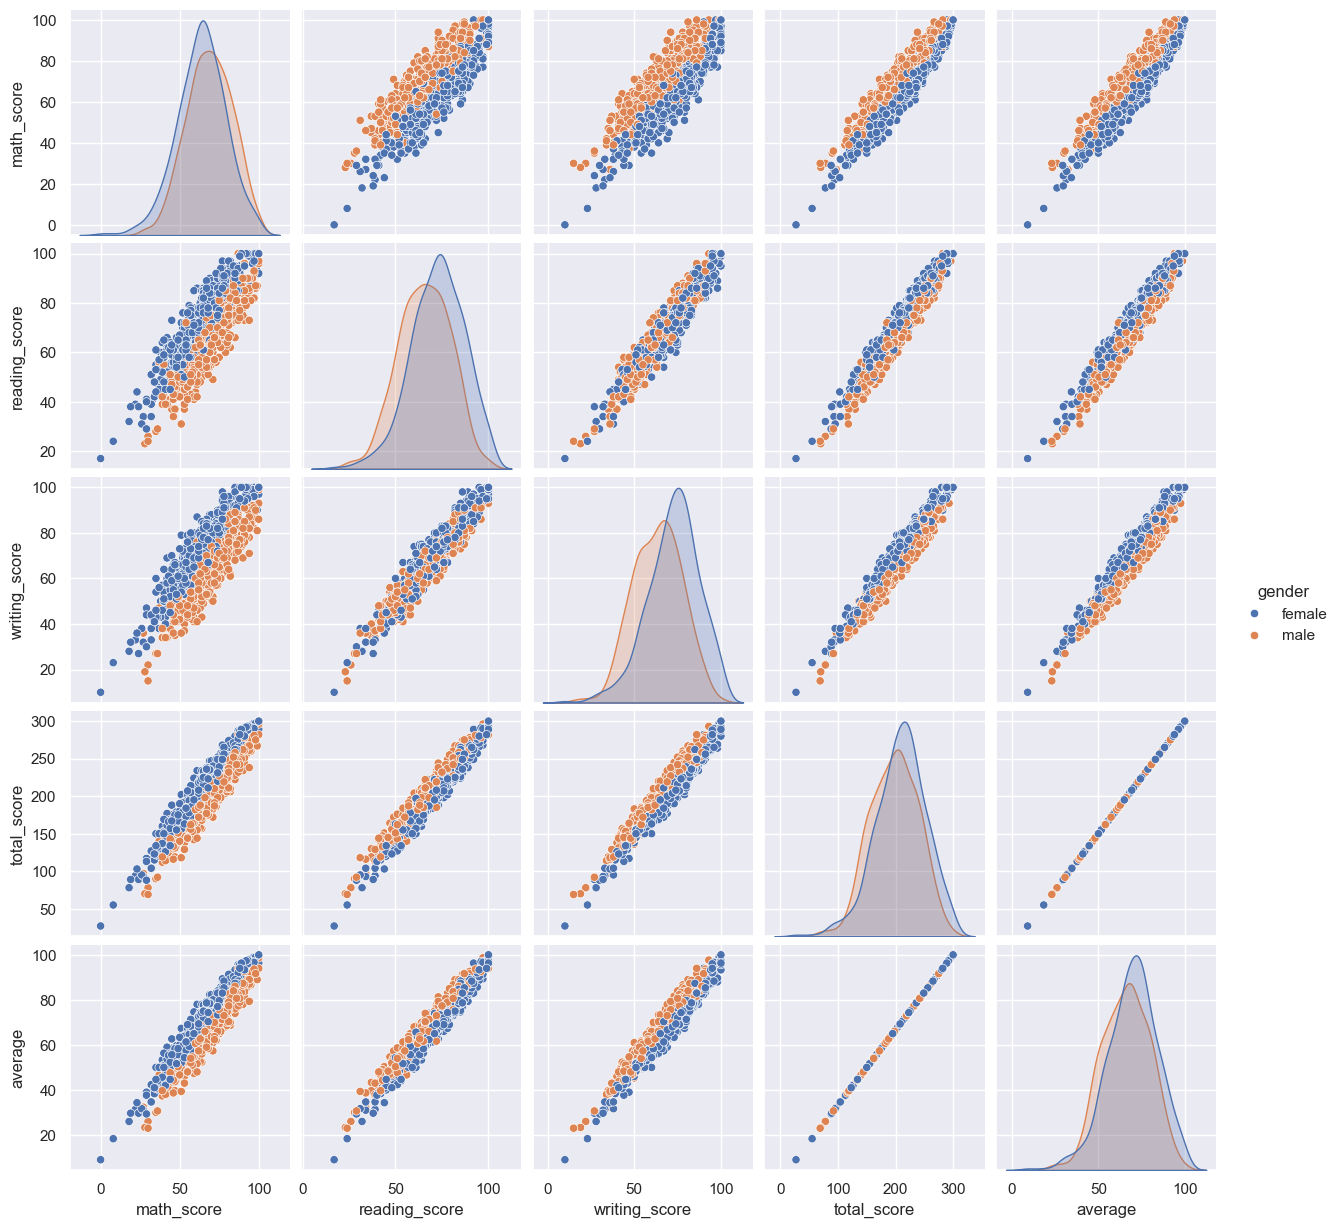

In [34]:
sns.pairplot(df,hue = 'gender')
plt.show()

### <span style="color:green;font-weight: bold;"><b>Insights</b></span> 
    Key Observations:
<ul>
<li><b><span style="color:red;"> Strong Positive Correlation:</span></b> There is a clear positive correlation between math, reading, and writing scores, indicating that students who excel in one subject tend to do well in others.</li>

<li><b><span style="color:red;">Gender Differences:</span></b> While the overall trends are similar, subtle score distribution differences exist between genders, with some scores more concentrated in certain ranges for one gender.</li>
</ul>

    Possible Inferences:

 -  <b><span style="color:red;">Interconnected Skills:</span></b> Academic success appears to stem from a combination of skills, where strengths in reading and writing can support math performance and vice versa.

<h1 style="color:yellow;"><b>Conclusions</b></h1>
<ul>
  <li><b><span style="color:red;">Influencing Factors:</span></b> A student's performance is influenced by factors such as lunch type, race, and parental education level.</li>
  <li><b><span style="color:red;">Gender Differences:</span></b> Female students tend to outperform their male counterparts, both in pass rates and overall scores.</li>
  <li><b><span style="color:red;">Test Preparation:</span></b> The test preparation course does not show a strong correlation with performance improvements.</li>
  <li><b><span style="color:red;">Benefits of Preparation:</span></b> Completing the test preparation course has a positive impact on performance, especially for students who engage with it.</li>
</ul>
